**Internsip | Summer 2024** #CODE BEGINS AT BOTTOM

**IMPORTANT**

You can use this **Jupyter** notebook *symbols_update.ipynb* to complete the assignment. 

If you are not familiar with **Jupyter**, please feel free to develop your solution using standard **.py** file instead.

To complete the assignment, you will need to **pip install pandas** library.

Please upload all your work to public **GitHub** repository and share the link with us.

There are three .csv files that we want to upload sequentially to the database: **symbols_update_1.csv**, **symbols_update_2.csv**, and **symbols_update_3.csv**. For the sake of simplicity, the database is represented by another .csv file **database.csv**.

The goal it to complete **SymbolsUpdate** class with three functions:
- ***load_new_data_from_file*** : loads and processes data from **symbols_update_n.csv** file
- ***save_new_data*** : saves loaded data to the **database.csv** file
- ***get_data_from_database*** : returns the most recently updated data for every symbol in **database.csv**

In [ ]:
class SymbolsUpdate(object):
    def __init__(self ):
        self.database_file = 'database.csv'

    def load_new_data_from_file(self, file_path: str):
        pass
        
    def save_new_data(self, input_data: pd.DataFrame):   
        pass
        
    def get_data_from_database(self):
        pass

Running the model should return the following table:

In [ ]:
su = SymbolsUpdate()
new_data = su.load_new_data_from_file('symbols_update_1.csv')
su.save_new_data(new_data)
new_data = su.load_new_data_from_file('symbols_update_2.csv')
su.save_new_data(new_data)
new_data = su.load_new_data_from_file('symbols_update_3.csv')
su.save_new_data(new_data)

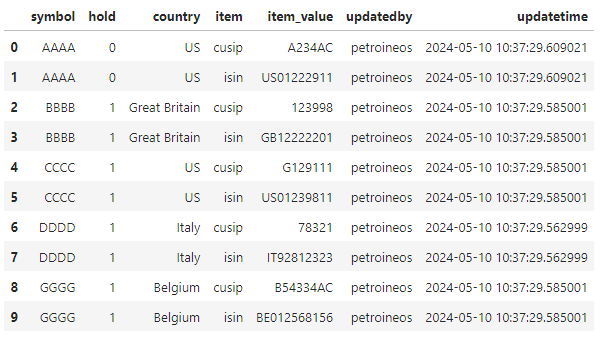

In [3]:
from IPython.display import Image
Image('output.png')

Please note:  
- *isin* and *cusip* columns from **symbols_update_n.csv** files are stored as item/item_value pairs in **database.csv**
- *country id* is derived from the *isin* field (e.g. US01222911 is US, GB12222201 is GB, etc…)
- The most recent update for each symbol is returned based on the **updatetime** column

**Good luck!!!**

In [1]:
#CODE BEGINS NOW:

In [2]:
import pandas as pd
from datetime import datetime
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)        
pd.set_option('display.max_colwidth', None)

In [3]:
class SymbolsUpdate:
    def __init__(self):
        self.database_file = 'database.csv'
        self.country_codes = {'US': 'US', 
                              'GB': 'Great Britain', 
                              'DE': 'Germany', 
                              'FR': 'France', 
                              'IT': 'Italy',
                              'BE': 'Belgium'  
                             }
    
    def load_new_data_from_file(self, file_path: str):
        df = pd.read_csv(file_path)
        processed_data = []
        
        for _, row in df.iterrows():
            country_code = row['isin'][:2]
            country = self.country_codes.get(country_code, 'Unknown')
            current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            
            # Entry for CUSIP
            processed_data.append({
                'Symbol': row['symbol'],
                'Hold': row['hold'],
                'Country': country,
                'Item': 'cusip',
                'Item_value': row['cusip'],
                'Updatedby': 'petroineos',  
                'Updatetime': current_time
            })
            
            # Entry for ISIN
            processed_data.append({
                'Symbol': row['symbol'],
                'Hold': row['hold'],
                'Country': country,
                'Item': 'isin',
                'Item_value': row['isin'],
                'Updatedby': 'petroineos',  
                'Updatetime': current_time
            })
        
        return pd.DataFrame(processed_data)
    
    def save_new_data(self, input_data: pd.DataFrame):
        try:
            db_df = pd.read_csv(self.database_file)
        except FileNotFoundError:
            db_df = pd.DataFrame()
        
        updated_db = pd.concat([db_df, input_data]).drop_duplicates(subset=['Symbol', 'Item'], keep='last')
        updated_db.sort_values('Symbol', inplace=True)
        updated_db.reset_index(drop=True, inplace=True)
        updated_db.to_csv(self.database_file, index=False)
    
    def get_data_from_database(self):
        try:
            db_df = pd.read_csv(self.database_file)
            return db_df
        except FileNotFoundError:
            return pd.DataFrame()

In [4]:
su = SymbolsUpdate()
new_data = su.load_new_data_from_file('symbols_update_1.csv')
su.save_new_data(new_data)
new_data = su.load_new_data_from_file('symbols_update_2.csv')
su.save_new_data(new_data)
new_data = su.load_new_data_from_file('symbols_update_3.csv')
su.save_new_data(new_data)

su.get_data_from_database()

,Symbol,Hold,Country,Item,Item_value,Updatedby,Updatetime
0,AAAA,0,US,cusip,A234AC,petroineos,2024-05-18 13:54:23
1,AAAA,0,US,isin,US01222911,petroineos,2024-05-18 13:54:23
2,BBBB,1,Great Britain,cusip,123998,petroineos,2024-05-18 13:54:23
3,BBBB,1,Great Britain,isin,GB12222201,petroineos,2024-05-18 13:54:23
4,CCCC,1,US,cusip,G129111,petroineos,2024-05-18 13:54:23
5,CCCC,1,US,isin,US01239811,petroineos,2024-05-18 13:54:23
6,DDDD,1,Italy,cusip,78321,petroineos,2024-05-18 13:54:23
7,DDDD,1,Italy,isin,IT92812323,petroineos,2024-05-18 13:54:23
8,GGGG,1,Belgium,cusip,B54334AC,petroineos,2024-05-18 13:54:23
9,GGGG,1,Belgium,isin,BE012568156,petroineos,2024-05-18 13:54:23
